In [1]:
import os

In [2]:
import pandas as pd
import numpy as np

In [3]:
from byc import *
from importlib import reload

### Modifications to `imagejpc.py`

Need to make set of dummy arg variables for testing

In [7]:
roi_set_type = 'measurement'
active_imp_path = r"C:\Users\John Cooper\Projects\byc\data\example_byc_expts\20200221_byc\pJC069_rpn4d\20200221_byc_xy00_cell000_bf_stack.tif"
active_imp_dir = active_imp_path[0:active_imp_path.rindex("\\")]
cell_index = 0
roi_set_save_path = f'{roi_set_type}_roi_set_save_path'
end_event_type = 'death'
imp_filename = utilities.filename_from_path(active_imp_path)
# Extract some information from the active image filename
xy = int(imp_filename[imp_filename.rindex('xy') + 2: imp_filename.rindex('xy') + 4])
date = imp_filename[0:8]

values = [cell_index,
          active_imp_path,
          roi_set_save_path,
          end_event_type,
          xy,
          date]

keys = ['cell_index',
        'active_imp_path',
        '{}_roi_set_save_path'.format(roi_set_type),
        'end_event_type',
        'xy',
        'date']
args = [cell_index,
        active_imp_path,
        roi_set_save_path,
        end_event_type,
        roi_set_type,
        active_imp_dir]

cell_roi_df = pd.DataFrame(dict(zip(keys, values)), index=[0])

Instantiate a single cell's roi record DataFrame

In [30]:
from byc.imagejpc import addcellroi
reload(addcellroi)

<module 'byc.imagejpc.addcellroi' from 'C:\\Users\\John Cooper\\Projects\\byc\\byc\\imagejpc\\addcellroi.py'>

In [31]:
cell_roi_df = addcellroi.record_cell_roi_set(*args, write=True)

No match found after looking for:['C:\\Users\\John Cooper\\Projects\\byc_data\\', 'C:\\Users\\John Cooper\\Projects\\byc\\data\\']
in:
C:\Users\John Cooper\Projects\byc\notebooks\measurement_roi_set_save_path
Could not find any master_index.csv type files in exptdir:
C:\Users\John Cooper\Projects\byc\data\example_byc_expts\20200221_byc
No master_index_dfs found for cell_roi_df in path:
C:\Users\John Cooper\Projects\byc\data\example_byc_expts\20200221_byc
Saved blank master_index at:
C:\Users\John Cooper\Projects\byc\data\example_byc_expts\20200221_byc\20200221_master_index.csv
Added cell info to master index and saved at
C:\Users\John Cooper\Projects\byc\data\example_byc_expts\20200221_byc\20200221_master_index.csv
Saved cell_roi_df at C:\Users\John Cooper\Projects\byc\data\example_byc_expts\20200221_byc\pJC069_rpn4d\20200221_byc_xy00cell000_measurement_rois_df.csv


In [9]:
from byc import *
for mod in [constants, database, utilities]:
    reload(mod)
    
from byc.imagejpc import addcellroi
reload(addcellroi)

<module 'byc.imagejpc.addcellroi' from 'C:\\Users\\John Cooper\\Projects\\byc\\byc\\imagejpc\\addcellroi.py'>

Need to make `imagejpc.addcellroi` script add dirname for active_imp_path

In [6]:
from importlib import reload
from byc import utilities

In [17]:
addcellroi.record_cell_roi_set

<function byc.imagejpc.addcellroi.record_cell_roi_set(cell_index, active_imp_path, roi_set_save_path, end_event_type, roi_set_type, active_imp_dir, **kwargs)>

In [16]:
os.path.join(constants.byc_data_dir, os.path.dirname(active_imp_path))

'C:\\Users\\John Cooper\\Projects\\byc\\data\\example_byc_expts\\20200221_byc\\pJC069_rpn4d'

In [14]:
os.path.dirname(active_imp_path)

'C:\\Users\\John Cooper\\Projects\\byc\\data\\example_byc_expts\\20200221_byc\\pJC069_rpn4d'

### Merging individual cell recordings into the master_index_df

In [1]:
import os
from importlib import reload
import re

import numpy as np
import pandas as pd
from skimage.draw import line
from skimage import io
import matplotlib.pyplot as plt

from read_roi import read_roi_zip

from byc import files, utilities, constants
from byc.imagejpc import addcellroi

In [3]:
# Create a master index data frame for the purpose
# of running byc/bin/run_segmentation to crop and
# Otsu threshold based on crop ROIs
write = False
compartment_dir = r"C:\Users\John Cooper\Projects\byc\data\20201127_byc\pJC189_mScarletI-1013deg"
exptdir = os.path.dirname(compartment_dir)
pattern = constants.patterns.crop_roi_df_file
paths = utilities.get_filepaths_with_pattern(pattern,
                                             rootdir=exptdir)

dfs = [pd.read_csv(p) for p in paths]
mdf = pd.concat(dfs, ignore_index=True)
exptdir = os.path.dirname(mdf.compartment_dir.unique()[0])
mdf_path = utilities.get_all_master_index_paths(exptdir)[0]

if os.path.exists(mdf_path):
    old_mdf = pd.read_csv(mdf_path)
    new_mdf = pd.concat([old_mdf, mdf])
else:
    print(f'No file at {mdf_path}/nCreating new master index there')
    
if write:
    # Save the updated master_index
    mdf.to_csv(mdf_path, index=False)

pattern = constants.patterns.crop_roi
paths = utilities.get_filepaths_with_pattern(pattern,
                                             rootdir=exptdir)

crop_roi_dfs = [files.read_roi_as_df(p) for p in paths]
crop_rois_df = pd.concat(crop_roi_dfs, ignore_index=True)

C:\Users\John Cooper\Projects\byc\data\20201127_byc\pJC189_mScarletI-1013deg\20201127_byc_cell000_crop_rois.zip
0
rectangle
0
rectangle
0
rectangle
0
rectangle
0
rectangle
0
rectangle
0
rectangle
0
rectangle
0
rectangle


ValueError: No objects to concatenate

In [4]:
path = r"C:\Users\John Cooper\Projects\byc\data\20201127_byc\pJC189_mScarletI-1013deg\20201127_byc_xy00_cell000_bf_stack_measurement_rois.zip"
meas_roi = read_roi_zip(path)

In [53]:
frame_dict = list(meas_roi.values())[0]
frame_dict['type']

'freehand'

In [57]:
frame_dict['']

'freehand'

In [46]:
paths = frame_dict['paths']

KeyError: 'paths'

In [140]:
from skimage.draw import polygon, polygon_perimeter

In [41]:
cell_stack_path = r"C:\\Users\\John Cooper\\Projects\\byc\\data\\20201127_byc\\pJC189_mScarletI-1013deg\\20201127_byc_xy00_cell000_bf_stack.tif"
cell_stack = io.imread(cell_stack_path)
img = cell_stack[141]
poly = np.array(paths[1])
rr, cc = polygon(poly[:, 0], poly[:, 1], img.shape)
# rr, cc = polygon_perimeter(poly[:, 0], poly[:, 1], img.shape)
# img[rr, cc] = 1

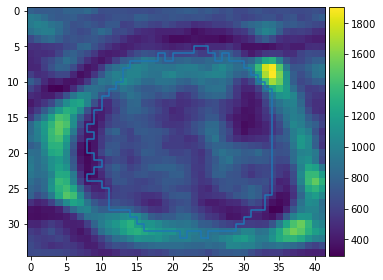

In [37]:
ax = plt.axes()

io.imshow(img)

ax.plot(rr, cc)

In [58]:
# Read in some cell segmentation rois as dfs and try plotting
# them on existing data
compartment_dir = r"C:\Users\John Cooper\Projects\byc\data\20201127_byc\pJC189_mScarletI-1013deg"
exptdir = os.path.dirname(compartment_dir)
pattern = constants.patterns.measurement_roi
paths = utilities.get_filepaths_with_pattern(pattern,
                                             rootdir=exptdir)

# meas_roi_dfs = [files.read_roi_as_df(p) for p in paths]
# meas_rois_df = pd.concat(meas_roi_dfs, ignore_index=True)

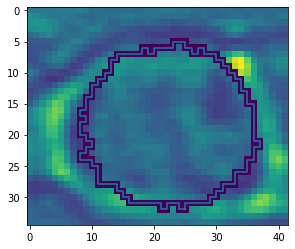

In [127]:
ax = plt.axes()

path = paths[0]
roi = read_roi_zip(path)
comp = roi[list(roi.keys())[142]]

cell_stack_path = r"C:\\Users\\John Cooper\\Projects\\byc\\data\\20201127_byc\\pJC189_mScarletI-1013deg\\20201127_byc_xy00_cell000_bf_stack.tif"
cell_stack = io.imread(cell_stack_path)
img = cell_stack[142]
poly = np.array(comp['paths'][1])
x, y = polygon_perimeter(poly[:, 0], poly[:, 1], (100, 100))
img[y, x] = 1
ax.imshow(img)
ax.plot(x, y)

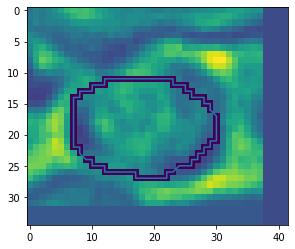

In [125]:
ax = plt.axes()
path = paths[0]
roi = read_roi_zip(path)
comp = roi[list(roi.keys())[8]]

cell_stack_path = r"C:\\Users\\John Cooper\\Projects\\byc\\data\\20201127_byc\\pJC189_mScarletI-1013deg\\20201127_byc_xy00_cell000_bf_stack.tif"
cell_stack = io.imread(cell_stack_path)
img = cell_stack[8]

x, y = polygon_perimeter(comp['x'], comp['y'], img.shape)

img[y, x] = 1
ax.plot(x, y)
ax.imshow(img)

In [128]:
path

'C:\\Users\\John Cooper\\Projects\\byc\\data\\20201127_byc\\pJC189_mScarletI-1013deg\\20201127_byc_xy00_cell000_bf_stack_measurement_rois.zip'

In [135]:
frame_df

,type,x,y,n,width,name,position
0,freehand,29,16,NaN,NaN,NaN,NaN
1,freehand,29,15,NaN,NaN,NaN,NaN
2,freehand,29,15,NaN,NaN,NaN,NaN
3,freehand,28,15,NaN,NaN,NaN,NaN
4,freehand,28,15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
145,freehand,30,18,NaN,NaN,NaN,NaN
146,freehand,30,18,NaN,NaN,NaN,NaN
147,freehand,30,17,NaN,NaN,NaN,NaN
148,freehand,30,17,NaN,NaN,NaN,NaN


In [139]:
roi = read_roi_zip(path)
print(path)
frame_dfs = []
roi_index = 0
for frame_key, frame_dict in roi.items():
    
    frame_df = pd.DataFrame()
    roi_type = frame_dict['type']
    print(f'ROI index {roi_index} of type {roi_type}')
    # Need to parse into dataframe differently
    # depending on the type of ROI in frame
    if roi_type == 'composite':
        poly = np.array(frame_dict['paths'][1])
        x, y = polygon_perimeter(poly[:, 0], poly[:, 1], (100, 100))
        frame_df['x'] = x
        frame_df['y'] = y
        for key, val in frame_dict.items():
            if type(val) == list and key == 'paths':
                pass
            elif  type(val) == list and key != 'paths':
                frame_df[key] = val
            elif type(val) == int or type(val) == str or type(val) == float:
                frame_df.loc[:, key] = val
    elif roi_type == 'traced' or roi_type == 'freehand':
        x, y = polygon_perimeter(frame_dict['x'], frame_dict['y'], img.shape)
        frame_df['x'] = x
        frame_df['y'] = y
        for key, val in frame_dict.items():
            if type(val) == list and key == 'paths':
                pass
            elif type(val) == list and key != 'paths':
                frame_df[key] = val
            elif type(val) == int or type(val) == str or type(val) == float:
                frame_df.loc[:, key] = val
#     frame_df.loc[:, 'roi_index'] = roi_index
#     frame_df.loc[:, 'path'] = path
    frame_dfs.append(frame_df)
    roi_index += 1

roi_df = pd.concat(frame_dfs, ignore_index=True)

C:\Users\John Cooper\Projects\byc\data\20201127_byc\pJC189_mScarletI-1013deg\20201127_byc_xy00_cell000_bf_stack_measurement_rois.zip
ROI index 0 of type freehand


ValueError: Length of values does not match length of index

In [17]:
paths[0]

'C:\\Users\\John Cooper\\Projects\\byc\\data\\20201127_byc\\pJC189_mScarletI-1013deg\\20201127_byc_xy00_cell000_bf_stack_measurement_rois.zip'

In [6]:
for mod in [files, addcellroi, constants, utilities]:
    reload(mod)

In [19]:
cell_stack_path = r"C:\\Users\\John Cooper\\Projects\\byc\\data\\20201127_byc\\pJC189_mScarletI-1013deg\\20201127_byc_xy00_cell000_rfp_stack.tif"
cell_stack = io.imread(cell_stack_path)
img = cell_stack[0]

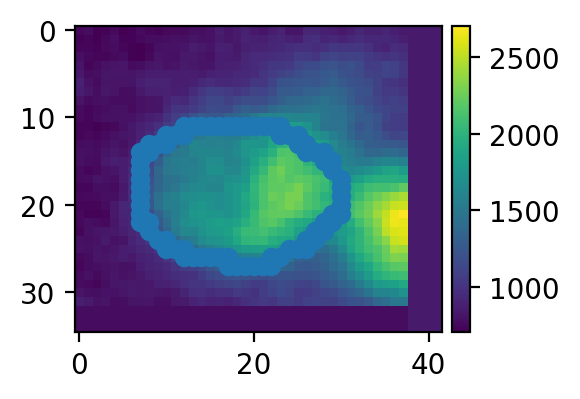

In [22]:
framedf = df[df.roi_index==0]

fig = plt.figure(figsize=(3, 3))
fig.set_dpi(200)
ax = plt.axes()

io.imshow(img)
    
ax.scatter(framedf.x, framedf.y)

AttributeError: 'AxesImage' object has no attribute 'plot'

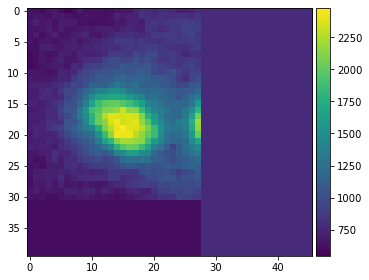

In [141]:
ax = io.imshow(cell_stack[0])
ax.plot(1, 2)